# Bivariates Plot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv('pokemon.csv')
df2 = pd.read_csv('fuel-econ.csv')

In [4]:
df1.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [6]:
#df2.head()

## Scatter plot (Quantitative vs Quantitative)

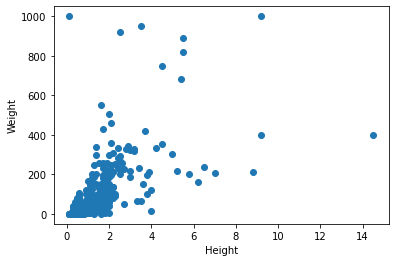

In [12]:

plt.scatter(data=df1, x='height', y='weight')
plt.xlabel('Height')
plt.ylabel('Weight');

> using seaborn sns.scatterplot(df1['height'],df1['weight']);

<AxesSubplot:xlabel='weight', ylabel='height'>

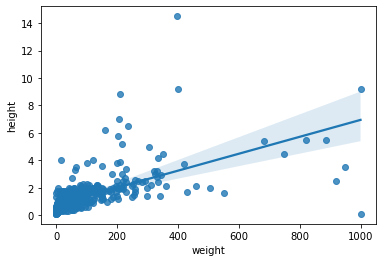

In [13]:
#correlation with regressional line
sns.regplot(data=df1, x='weight', y='height')

# Overlapping, Transparancy

<AxesSubplot:xlabel='weight', ylabel='height'>

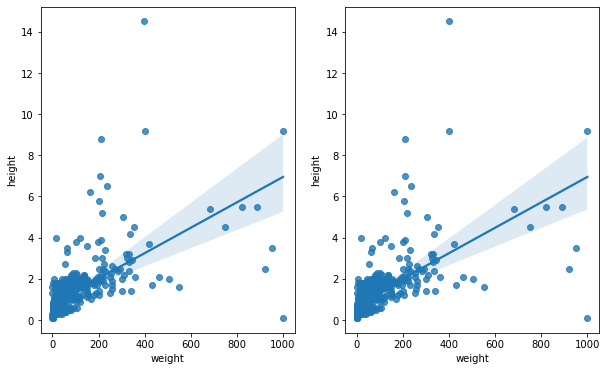

In [26]:
#
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.regplot(data=df1, x='weight', y='height')

#used jitter to avoid overlapping
plt.subplot(1,2,2)
sns.regplot(data=df1, x='weight', y='height', x_jitter=0.5)

In [27]:
df2.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


<AxesSubplot:xlabel='year', ylabel='comb'>

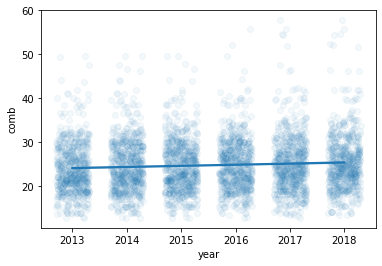

In [30]:
sns.regplot(data=df2, x='year', y='comb', x_jitter=0.3, scatter_kws={'alpha':1/20})

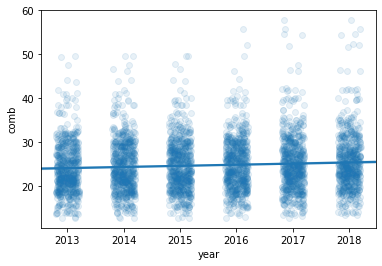

In [31]:
sns.regplot(data = df2, x = 'year', y = 'comb', truncate=False, x_jitter=0.2, scatter_kws={'alpha':1/10});

## HeatMap

### 1. Use Matplotlib

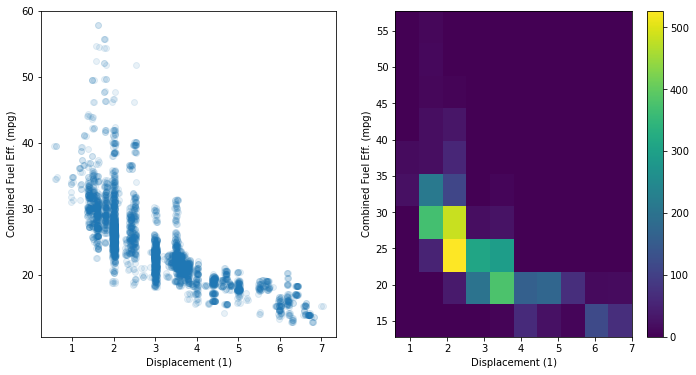

In [41]:
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 3, 1)
sns.regplot(data = df2, x = 'displ', y = 'comb', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# PLOT ON MIDDLE
plt.subplot(1, 3, 2)
plt.hist2d(data = df2, x = 'displ', y = 'comb')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# PLOT ON RIGHT


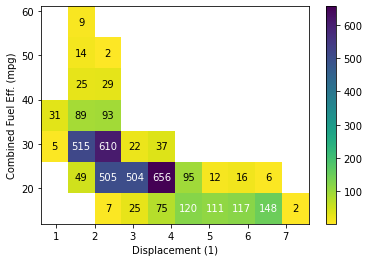

In [47]:
# PLOT ON MIDDLE
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)

#cmap for color, cmin to set minimum points at least 1
h2d = plt.hist2d(data = df2, x = 'displ', y = 'comb', cmap='viridis_r', cmin=0.5, bins=[bins_x,bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

### Using Seaborn


<AxesSubplot:>

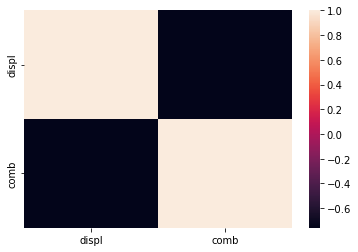

In [49]:
sns.heatmap(df2[['displ','comb']].corr())

## Violin plot

In [50]:
df2.head(2)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6


C:\Users\d\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\d\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 65.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\d\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\d\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\d\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.7% of the points cannot be placed; y

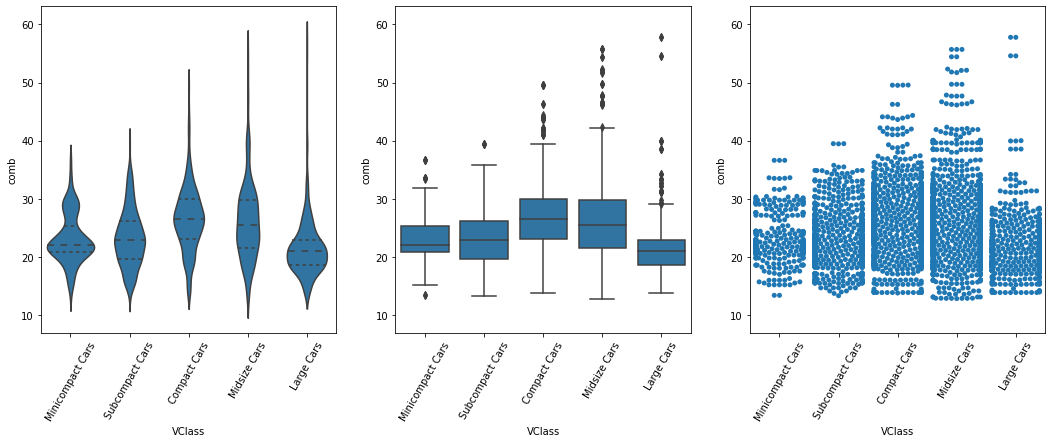

In [139]:
#ordinal variable type
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.CategoricalDtype(ordered=True, categories=sedan_classes)
df2['VClass'] = df2['VClass'].astype(vclasses);

plt.figure(figsize = [18, 6])
#inner=None will remove the boxplot,inner=quartile will show boxplot summary(IQR) color=to default
plt.subplot(1,3,1)
ax1 = sns.violinplot(data=df2, x='VClass', y='comb', color = sns.color_palette()[0], inner='quartile')
plt.xticks(rotation=60);

plt.subplot(1,3,2)
ax2 = sns.boxplot(data=df2, x='VClass', y='comb', color = sns.color_palette()[0])
plt.xticks(rotation=60);
plt.ylim(ax1.get_ylim());

plt.subplot(1,3,3)
ax3 = sns.swarmplot(data=df2, x='VClass', y='comb', color = sns.color_palette()[0])
plt.xticks(rotation=60);
plt.ylim(ax2.get_ylim());

## Clustered Bar chart

In [96]:
df2['trans_type'] = df2['trans'].apply(lambda x:x.split()[0])
df2.head(2)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic


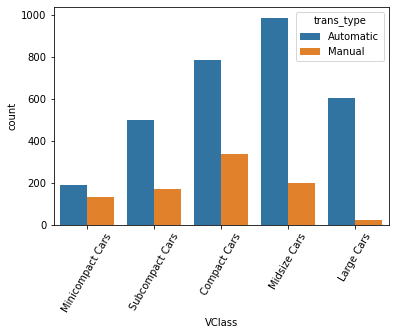

In [97]:
sns.countplot(data=df2, x='VClass', hue='trans_type');
plt.xticks(rotation=60);

## Faceting

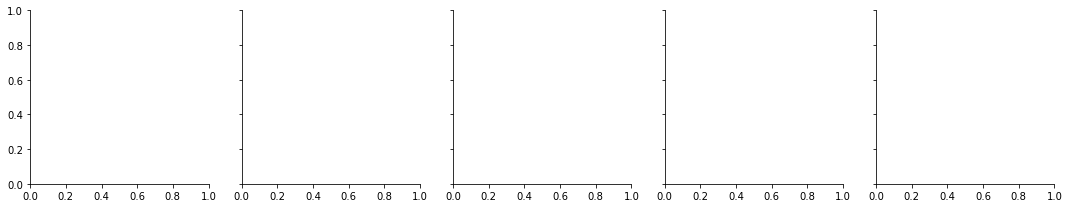

In [107]:
#create the facet grid
#col_wrap=3, 3 col per line
#share_y=False, each plot will have diffrent y-axis
g = sns.FacetGrid(data=df2, col='VClass')
g

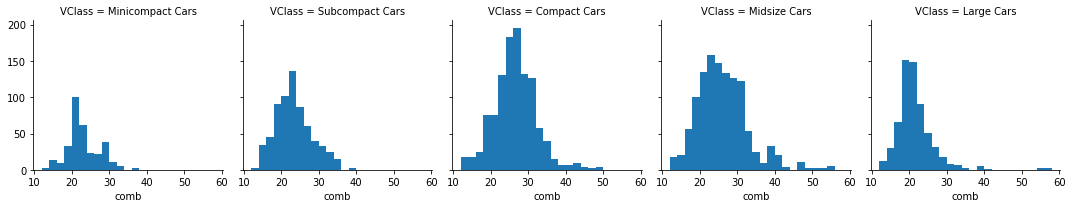

In [108]:
#add the plot
bins = np.arange(12,58+2,2)
g.map(plt.hist, 'comb', bins=bins);

## Adapting Univariate plots for Bivariate

Text(0, 0.5, 'Avg. Combined Fuel Efficiency (mpg)')

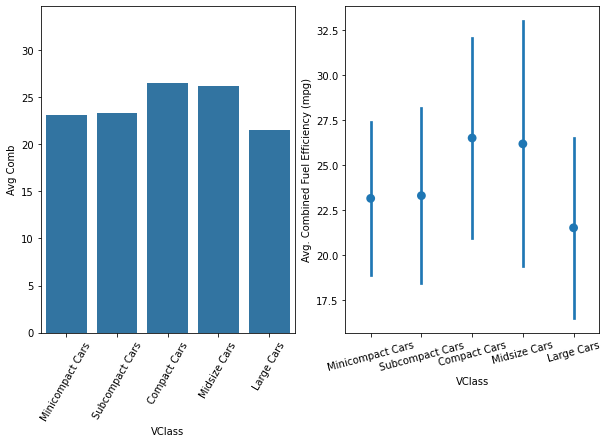

In [119]:
#with error bars plotted to show the uncertainty in the mean based on variance and sample size.
#errwidth=0 will remove the uncertaincty
#ci='sd', for avg std instead of avg mean
base_color = sns.color_palette()[0]
plt.figure(figsize=[10,6])
plt.subplot(1,2,1)
sns.barplot(data=df2, x='VClass', y='comb', color=base_color, errwidth=0, ci='sd')
plt.xticks(rotation=60);
plt.ylabel('Avg Comb')

#if the categories are ordinal no need of linestyles attribute
plt.subplot(1,2,2)
sns.pointplot(data=df2, x='VClass', y='comb', color=base_color, ci='sd', linestyles="")
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')


## Line Plot

In [122]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin 
bin_edges = np.arange(0.6, 7+0.2, 0.2)
bin_centers = bin_edges[:-1] + 0.1

# Cut the bin values into discrete intervals. Returns a Series object.
displ_binned = pd.cut(df2['displ'], bin_edges, include_lowest = True)
displ_binned

0       (3.6, 3.8]
1       (1.8, 2.0]
2       (3.4, 3.6]
3       (3.4, 3.6]
4       (2.2, 2.4]
           ...    
3924    (1.6, 1.8]
3925    (1.8, 2.0]
3926    (1.8, 2.0]
3927    (3.2, 3.4]
3928    (3.2, 3.4]
Name: displ, Length: 3929, dtype: category
Categories (32, interval[float64, right]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] ... (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

In [124]:
# For the points in each bin, we compute the mean and standard error of the mean.
comb_mean = df2['comb'].groupby(displ_binned).mean()
comb_std = df2['comb'].groupby(displ_binned).std()


C:\Users\d\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\d\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


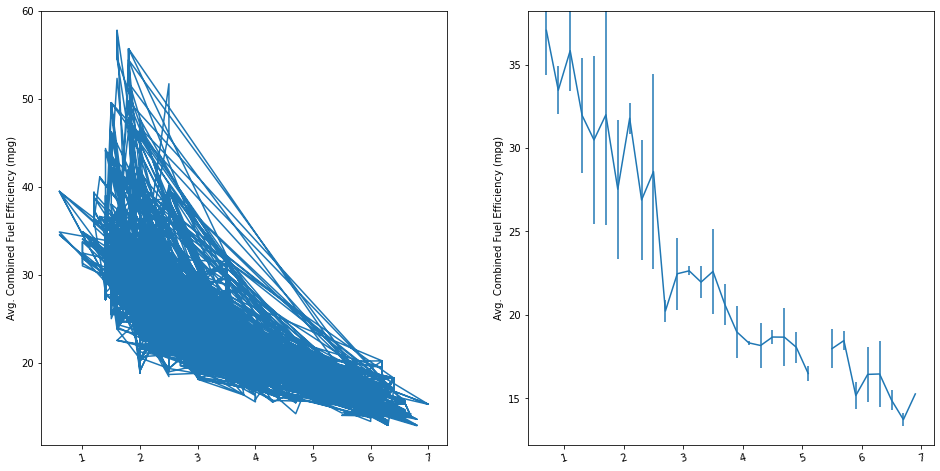

In [129]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.errorbar(data=df2, x='displ', y='comb')
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

plt.subplot(1,2,2)

# Plot the summarized data
plt.errorbar(x=bin_centers, y=comb_mean, yerr=comb_std)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

## swamp plot